<a href="https://www.inove.com.ar"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/PA%20Banner.png" width="1000" align="center"></a>


# Ejercicio de clasificación con redes neuronales convolucionales (CNN)

Ejemplo de clasificación utilizando redes neuronales para la clasificación de imagenes<br>

v1.1

In [1]:
import os
import platform

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import keras
from keras.models import Sequential
#from keras.utils import to_categorical  
from keras.utils.np_utils import to_categorical # Si esto no funciona, probar con el import anterior

# Recolectar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline1.png" width="1000" align="middle">

In [2]:
from keras.datasets import fashion_mnist

# Leer el dataset de mnist
(data_X_train, data_y_train), (data_X_test, data_y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


### `Fashion MNIST dataset`:
El dataset **`Fashion MNIST`** contiene 70.000 imagenes de categorías de ropa (remeras, zapatillas, pantalones). Cada imagen es de 28x28 píxeles en escala de grises (1 canal o 1 nivel de profundidad). Es uno de los dataset más utilizados para poner a prueba algoritmos de clasificación de imagenes.<br> [Dataset source](https://keras.io/api/datasets/fashion_mnist/)
- La entrada (X) es una variable imagen de 28x28
- La salida (y) es el la posible categoría de ropa que pertenece la imagen:

    - 0 -> T-shirt/top (remera de manga corta)
    - 1	-> Trouser (pantalón)
    - 2	-> Pullover (pulover)
    - 3	-> Dress (vestido)
    - 4	-> Coat (saco)
    - 5	-> Sandal (sandalia)
    - 6	-> Shirt (remera de manga larga)
    - 7	-> Sneaker (zapatilla)
    - 8	-> Bag (bolso)
    - 9	-> Ankle boot (bota)


In [3]:
category_list = ["remera_corta", "pantalon", "pulover", "vestido", "saco", "sandal",
                 "remera_larga", "zapatilla", "bolso", "bota"]

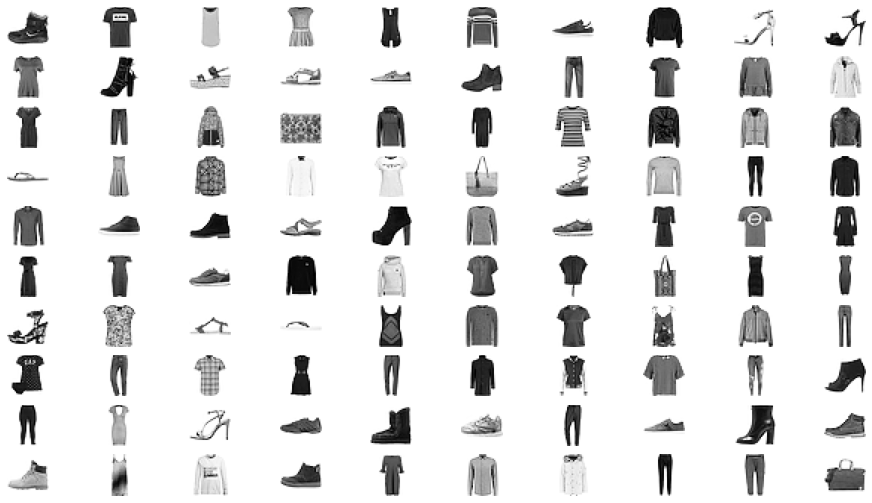

In [4]:
# Visualizar las 100 primeras imagenes
fig = plt.figure(figsize=(16,9))
for i in range(100):
    ax = fig.add_subplot(10, 10, i+1)
    ax.axis('off')
    plt.imshow(data_X_train[i], cmap='Greys')
plt.show()

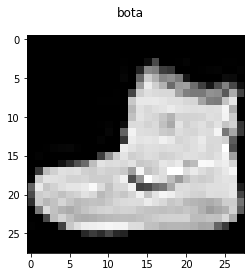

In [5]:
# Alumno, dibuje la primera imagen y su correspondiente categoria
plt.suptitle(category_list[data_y_train[0]])
plt.imshow(data_X_train[0], cmap='gray') 

# Procesar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline2.png" width="1000" align="middle">

In [6]:
# Alumno: Observar como está representada la imagen, ver fila del medio (14)
data_X_train[0][14]

array([  0,   0,   1,   4,   6,   7,   2,   0,   0,   0,   0,   0, 237,
       226, 217, 223, 222, 219, 222, 221, 216, 223, 229, 215, 218, 255,
        77,   0], dtype=uint8)

In [7]:
# Alumno: Normalizar los datos entre 0 y 1
X_train_norm = data_X_train/255
X_test_norm = data_X_test/255
#X_train_norm[0][14]

In [8]:
# Alumno: Imprimir la cantidad de datos en observacion (cantidad de imagenes)
X_train_norm.shape[0]

60000

In [9]:
# Alumno: Imprimir la dimension de la imagen
X_train_norm[0].shape

(28, 28)

In [10]:
# Alumno: En estas imagenes sin escalas de grieses no vienen con el canal especificado
# Deberia ser (28, 28, 1) para poder utilizar en una red CNN
# Agregar el [samples][pixels][width][height]
X_train = X_train_norm.reshape(X_train_norm.shape[0],X_train_norm.shape[1],X_train_norm.shape[2], 1).astype('float32')
X_test = X_test_norm.reshape(X_test_norm.shape[0] ,X_test_norm.shape[1],X_test_norm.shape[2],1).astype('float32')
#plt.imshow(data_X_train[0], cmap='gray') 
X_train[0].shape
#X_test[0].shape

(28, 28, 1)

# Explorar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline3.png" width="1000" align="middle">

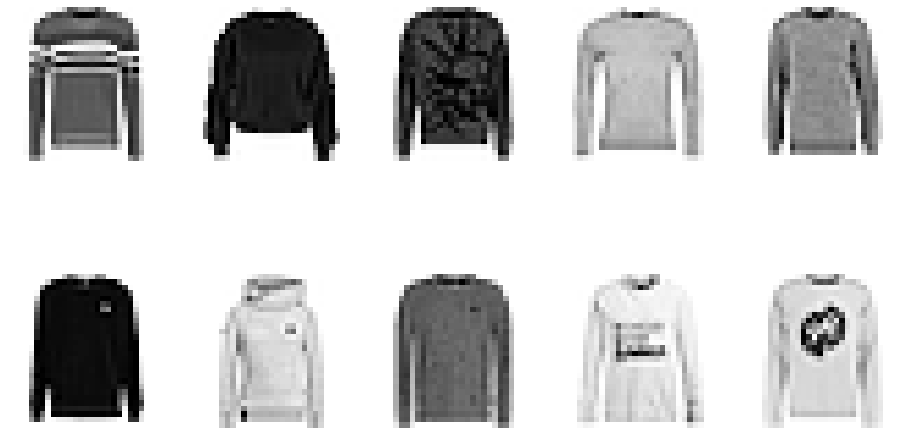

In [11]:
# Alumno: Explor los primeros diez puloveres del dataset de train
fig = plt.figure(figsize=(16,9))
j = 0 
for i in range(10):
    ax = fig.add_subplot(2, 5, i+1)
    ax.axis('off')
    while True:
      if data_y_train[j] == 2:
        plt.imshow(X_train_norm[j], cmap='Greys')
        j += 1
        break
      j += 1 
plt.show()


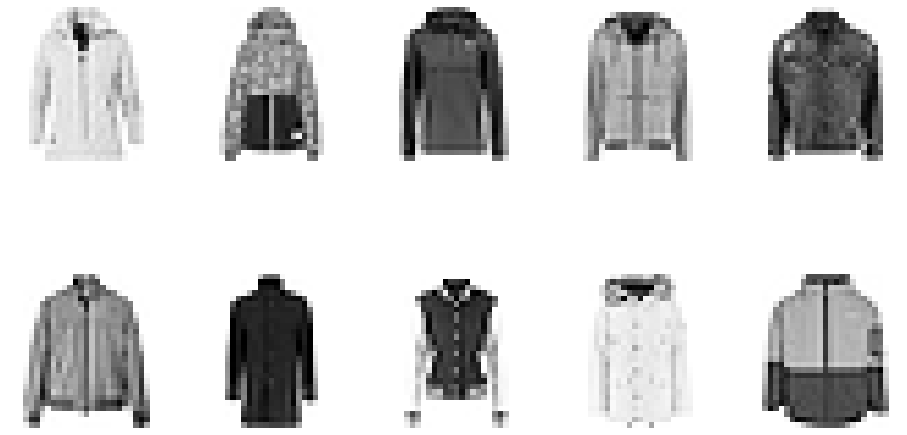

In [12]:
# Alumno: Explor los primeros diez sacos del dataset de train

fig = plt.figure(figsize=(16,9))
j = 0

for i in range (10):
  ax = fig.add_subplot(2 , 5 , 1 + i)
  ax.axis('off')
  while True:
    if category_list[data_y_train[j]] == 'saco':
      plt.imshow(X_train_norm[j],cmap='Greys')
      j += 1
      break
    j += 1
plt.show()

Se puede ver que los puloveres y los sacos son muy similares, salvo que los sacos tiene botones o cierre

# Entrenar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline4.png" width="1000" align="middle">

Los datos ya estan dividios en train y test

In [13]:
# Alumno: Transformar la salida a oneHotEncoding con to_categorical
# tanto para data_y_train como para data_y_test
y_train = to_categorical(data_y_train)
y_test = to_categorical(data_y_test)

In [14]:
# input shape
in_shape = X_train.shape[1:]
in_shape

(28, 28, 1)

In [15]:
# output shape
out_shape = y_train.shape[1]

In [16]:
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D

# Alumno, crear un modelo con la cantidad de capas de CONV y POOL
# que vea que da mejor resultado
model = Sequential()
model.add(Conv2D(filters=8, kernel_size=(5, 5), strides=(1, 1), padding='same', activation='relu', input_shape=in_shape))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Flatten())
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=out_shape, activation='softmax'))

model.compile(optimizer="Adam",
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 8)         208       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 8)         0         
_________________________________________________________________
flatten (Flatten)            (None, 1568)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                100416    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 101,274
Trainable params: 101,274
Non-trainable params: 0
_________________________________________________________________


In [17]:
# Alumno: entrenar el modelo
history = model.fit(X_train, y_train, validation_split=0.2 , epochs=10, batch_size=128)

Epoch 1/10
375/375 [==============================] - 47s 8ms/step - loss: 0.8132 - accuracy: 0.7235 - val_loss: 0.4101 - val_accuracy: 0.8579
Epoch 2/10
375/375 [==============================] - 3s 7ms/step - loss: 0.3796 - accuracy: 0.8664 - val_loss: 0.3492 - val_accuracy: 0.8803
Epoch 3/10
375/375 [==============================] - 2s 6ms/step - loss: 0.3247 - accuracy: 0.8873 - val_loss: 0.3279 - val_accuracy: 0.8863
Epoch 4/10
375/375 [==============================] - 2s 6ms/step - loss: 0.3043 - accuracy: 0.8932 - val_loss: 0.3045 - val_accuracy: 0.8957
Epoch 5/10
375/375 [==============================] - 2s 6ms/step - loss: 0.2812 - accuracy: 0.8990 - val_loss: 0.3185 - val_accuracy: 0.8875
Epoch 6/10
375/375 [==============================] - 2s 7ms/step - loss: 0.2719 - accuracy: 0.9024 - val_loss: 0.2903 - val_accuracy: 0.8963
Epoch 7/10
375/375 [==============================] - 2s 6ms/step - loss: 0.2490 - accuracy: 0.9100 - val_loss: 0.2910 - val_accuracy: 0.8958
Epoch

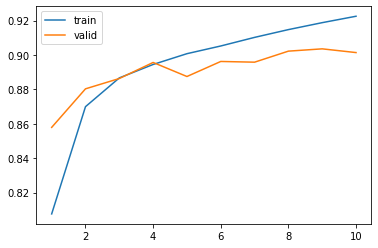

In [18]:
epoch_count = range(1, len(history.history['accuracy']) + 1)
sns.lineplot(x=epoch_count,  y=history.history['accuracy'], label='train')
sns.lineplot(x=epoch_count,  y=history.history['val_accuracy'], label='valid')
plt.show()

In [19]:
# Alumno: Predecir las probabilidades del dataset X_test
predict = model.predict(X_test)


In [20]:
# Alumno: Transformar las probabilidades en y_hat usando argmax
y_hat = np.argmax(predict , axis=1)
#y_hat[0]

# Validar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline5.png" width="1000" align="middle">

In [21]:
# Alumno: Utilizar evaluate para calcular la exactitud (accuracy)
model.evaluate(X_test,y_test)


313/313 [==============================] - 1s 3ms/step - loss: 0.2985 - accuracy: 0.8964


[0.29851120710372925, 0.896399974822998]

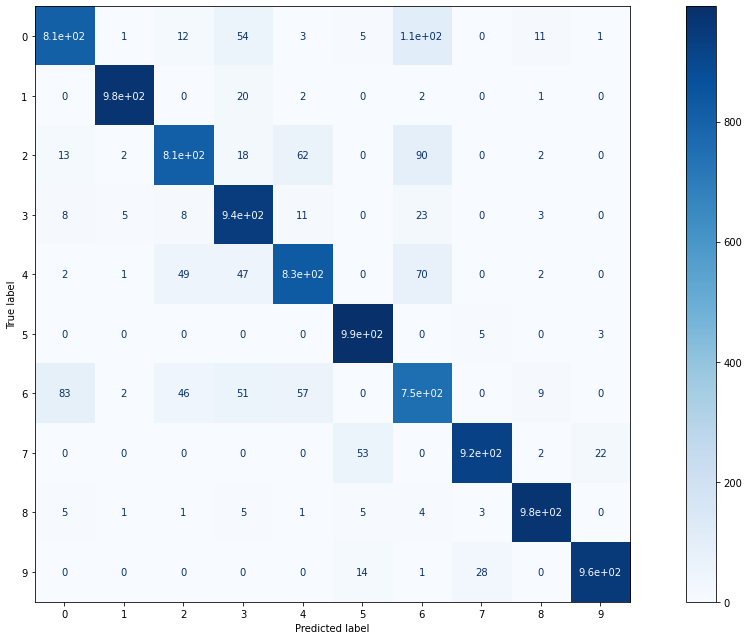

In [47]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay , plot_confusion_matrix
fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot()
cm = confusion_matrix(y_test.argmax(axis=1), y_hat)
cmd = ConfusionMatrixDisplay(cm, display_labels=list(range(10)))

cmd.plot(cmap=plt.cm.Blues , ax=ax)
plt.tight_layout()
plt.show()

Se puede observar que hay muy malas predicciones en los sacos y vestidos

# Utilizar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline6.png" width="1000" align="middle">

Se utiliza el ranking de los peores 10 sacos clasificados para evaluar

In [23]:
rank_saco = [4166, 4641, 6513, 324, 9292, 4646, 3290, 5255, 5919, 1329]

In [24]:
# Alumno: Obtener los vectores para evaluar los sacos indicados
# Utilizar como máscara rank_saco
peores_sacos = X_test[rank_saco]
peores_sacos_y = y_test[rank_saco]


In [25]:
# Alumno: Calcular la exactitud de los sacos seleccionados
model.evaluate(peores_sacos , peores_sacos_y)

1/1 [==============================] - 0s 34ms/step - loss: 1.0129 - accuracy: 0.6000


[1.012871503829956, 0.6000000238418579]

In [26]:
# Alumno: Realizar la prediccion con los X_test de los sacos
# y calcular los y_hat de esos sacos (lo que el sistema ve)
predict_saco = model.predict(peores_sacos)
y_hat_saco = np.argmax(predict_saco, axis=1)



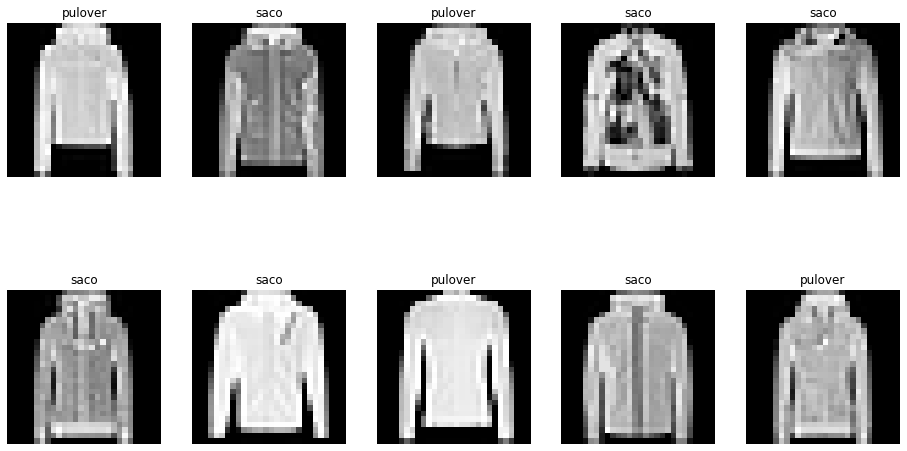

In [33]:
# Alumno: Dibujar las imagenes del dataset X_test correspondiente
# a los IDs de los sacos especificados y colocar arriba de cada imagen
# lo que el modelo predijo
# Utilizar "category_list" para transformar el número a la categoría

fig = plt.figure(figsize=(16,9))
j = 0

for i in rank_saco:
    ax = fig.add_subplot(2, 5, j+1)
    ax.axis('off')
    ax.imshow(X_test_norm[i],cmap='gray')
    ax.set_title(category_list[y_hat_saco[j]])
    j += 1

plt.show()
